# PDF data reduction tutorial

## What is the data reduction?

The data reduction is a process in which a two dimensional diffraction image is reduced to a one dimensional x-ray diffraction pattern.

<img src="data/images/diagram.svg" width=1000>

## What software we need for the data reduction?

Only one -- pdfstream. Please read the website to know how to install it: https://xpdacq.github.io/PDFstream/installation.html.

## Before start

Here, I will find all the data files related to the project and put them in an xarray.DataArray. You can uncomment the following block and change the "my_tiff_bases" to build the tiff file array on your computer.

In [1]:
from pathlib import Path


def find_tiff_files(tiff_bases, criterion):
    """Find all the tiff files in folders that satisfies certain criterion.
    
    Parameters
    ----------
    tiff_bases : List[str]
        The folders that holds tiff files.
    
    criterion : Callable
        A function. criterion(tiff_file_path: Path) -> bool.
        
    Yields
    ------
    tiff_file : str
        A path to the tiff file.
    """
    for tiff_base in tiff_bases:
        for tiff_file_path in Path(tiff_base).rglob("*.tiff"):
            if criterion(tiff_file_path):
                yield str(tiff_file_path)

                
def my_criterion(tiff_file_path):
    """My criterion. The file should start with a 'C_'."""
    if tiff_file_path.stem.startswith("C_"):
        return True

In [2]:
import numpy as np
    
my_tiff_bases = [
    "/Volumes/STAO_EXT/data_20201125_0/tiff_base",
    "/Volumes/STAO_EXT/data_20201125_1/tiff_base"
]
    
my_tiff_files = np.array(list(find_tiff_files(my_tiff_bases, my_criterion)))

In [3]:
def get_sample_name(file_path):
    """Get sample name from the file path string."""
    path = Path(file_path)
    name =  path.parent.parent.parent.stem
    if name == "tiff_base":
        name = path.parent.parent.stem
    return name


def get_x_position(file_path):
    """Get x position from the file path string."""
    try:
        return float(Path(file_path).parent.stem)
    except ValueError:
        return np.NaN

In [4]:
my_sample_names = np.vectorize(get_sample_name)(my_tiff_files)
my_x_positions = np.vectorize(get_x_position)(my_tiff_files)

In [5]:
import xarray as xr


my_tiff_file_array = xr.DataArray(
    my_tiff_files,
    coords={
        "sample_name": (['dim_0'], my_sample_names),
        "position": (['dim_0'], my_x_positions)
    }
)
my_tiff_file_array = my_tiff_file_array.sortby(["sample_name", "position"])

In [6]:
my_tiff_file_array.to_netcdf("data/xarrays/tiff_array.nc")

## Here are our data

In [7]:
import xarray as xr


tiff_files = xr.load_dataarray("data/xarrays/tiff_array.nc")

In [8]:
tiff_files

<xarray.DataArray (dim_0: 103)>
array(['/Volumes/STAO_EXT/data_20201125_1/tiff_base/C_Ni/dark_sub/C_Ni_20201124-002753_8e1359_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_0/tiff_base/C_Tatania1/dark_sub/46.8/C_Tatania1_20201125-075418_227fb0_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_0/tiff_base/C_Tatania1/dark_sub/46.8/C_Tatania1_20201124-212902_ced703_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_0/tiff_base/C_Tatania1/dark_sub/46.8/C_Tatania1_20201124-143552_552304_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_1/tiff_base/C_Tatania1/dark_sub/46.8/C_Tatania1_20201125-024146_e5f55c_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_1/tiff_base/C_Tatania1/dark_sub/46.8/C_Tatania1_20201124-192420_cfa4fe_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_1/tiff_base/C_Tatania1/dark_sub/46.8/C_Tatania1_20201125-051759_de8c07_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_1/tiff_base/C_Tatania1/dark_sub/46.8/C_Tatania1_20201124-115936_279116_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_1/tiff_base/C_Tatania1/dark_sub/46.8/C_Tatania1_20201125-000524_88181d_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_0/tiff_base/C_Tatania1/dark_sub/48/C_Tatania1_20201124-235222_3d6f13_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_0/tiff_base/C_Tatania1/dark_sub/48/C_Tatania1_20201125-074118_2f13c4_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_0/tiff_base/C_Tatania1/dark_sub/48/C_Tatania1_20201125-022844_7f6b1b_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_0/tiff_base/C_Tatania1/dark_sub/48/C_Tatania1_20201124-114634_33ef92_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_0/tiff_base/C_Tatania1/dark_sub/48/C_Tatania1_20201124-211602_0280dc_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_1/tiff_base/C_Tatania1/dark_sub/48/C_Tatania1_20201124-193720_17d888_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_1/tiff_base/C_Tatania1/dark_sub/48/C_Tatania1_20201124-142252_8cf193_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_1/tiff_base/C_Tatania1/dark_sub/48/C_Tatania1_20201125-050458_aa480a_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_1/tiff_base/C_Tatania1/dark_sub/48/C_Tatania1_20201124-165928_1e3e46_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_0/tiff_base/C_Tatania1/dark_sub/49.5/C_Tatania1_20201124-171230_1b7f40_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_0/tiff_base/C_Tatania1/dark_sub/49.5/C_Tatania1_20201125-072816_673ad3_0001_dark_corrected_img.tiff',
...
       '/Volumes/STAO_EXT/data_20201125_0/tiff_base/C_Tatania6/dark_sub/15.5/C_Tatania6_20201124-232616_22e4b6_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_0/tiff_base/C_Tatania6/dark_sub/15.5/C_Tatania6_20201125-043854_5a6191_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_1/tiff_base/C_Tatania6/dark_sub/15.5/C_Tatania6_20201124-191116_82b156_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_1/tiff_base/C_Tatania6/dark_sub/15.5/C_Tatania6_20201124-135648_1c2f40_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_1/tiff_base/C_Tatania6/dark_sub/15.5/C_Tatania6_20201124-163324_cd0079_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_0/tiff_base/C_Tatania6/dark_sub/16.8/C_Tatania6_20201124-162025_ec0df5_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_0/tiff_base/C_Tatania6/dark_sub/16.8/C_Tatania6_20201125-070210_86f968_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_0/tiff_base/C_Tatania6/dark_sub/16.8/C_Tatania6_20201124-134348_8f02d3_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_E

## How to run the calibration using pyFAI-calib2?

We use the pyFAI-calib2 to do the calibration. It is a command line tool with the syntax below:

``pyFAI-calib2 -c <d-spacing file> -w <wavelength in angstrom> -D <detector name or a spline file> -i <output poni file> <calibrant tiff file>``

The d-space file in our case is here: "data/calibration/Ni_dspacing.txt"

The wavelength in our case is: 0.1665

The detector is: "perkin_elmer"

In [9]:
wavelength = '0.1675'
dspacing_file = "data/calibration/Ni_dspacing.txt"
detector = "perkin_elmer"

Here is our calibrant scattering image.

In [10]:
# Ni calibrant tiff file
calibrant_image = tiff_files.where(tiff_files.sample_name == "C_Ni", drop=True).item()
calibrant_image

'/Volumes/STAO_EXT/data_20201125_1/tiff_base/C_Ni/dark_sub/C_Ni_20201124-002753_8e1359_0001_dark_corrected_img.tiff'

Here, I define a variable that is the place where I would like to save the poni file.

In [11]:
poni_file = "data/calibration/1675.poni"

Let's start the calibration. Here, I run the command using subprocess.

In [12]:
# the command defined in a list of args
cmd = ['pyFAI-calib2', '-c', dspacing_file, '-w', wavelength, '-D', detector, '-i', poni_file, calibrant_image]

In [13]:
import subprocess

cp = subprocess.run(
    cmd,
    stdin=subprocess.PIPE,
    stderr=subprocess.PIPE,
    stdout=subprocess.PIPE
)

You can also run the command in the terminal. The command is shown in the output of the cell below.

In [14]:
print(' '.join(cmd))

pyFAI-calib2 -c data/calibration/Ni_dspacing.txt -w 0.1675 -D perkin_elmer -i data/calibration/1675.poni /Volumes/STAO_EXT/data_20201125_1/tiff_base/C_Ni/dark_sub/C_Ni_20201124-002753_8e1359_0001_dark_corrected_img.tiff


## A test for the validity of the calibration (skipped)

A test for the calibration result. The quality of calibration is evaluated by the goodness of the fit of the PDF of.

## How to average the images using PDFstream?

First, we average one diffraction of the sample for an example.

In [15]:
example_sample_images = tiff_files.where(
    (tiff_files.sample_name == "C_Tatania1") & (tiff_files.position == 48.), 
    drop=True
)
example_sample_images

<xarray.DataArray (dim_0: 9)>
array(['/Volumes/STAO_EXT/data_20201125_0/tiff_base/C_Tatania1/dark_sub/48/C_Tatania1_20201124-235222_3d6f13_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_0/tiff_base/C_Tatania1/dark_sub/48/C_Tatania1_20201125-074118_2f13c4_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_0/tiff_base/C_Tatania1/dark_sub/48/C_Tatania1_20201125-022844_7f6b1b_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_0/tiff_base/C_Tatania1/dark_sub/48/C_Tatania1_20201124-114634_33ef92_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_0/tiff_base/C_Tatania1/dark_sub/48/C_Tatania1_20201124-211602_0280dc_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_1/tiff_base/C_Tatania1/dark_sub/48/C_Tatania1_20201124-193720_17d888_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_1/tiff_base/C_Tatania1/dark_sub/48/C_Tatania1_20201124-142252_8cf193_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_1/tiff_base/C_Tatania1/dark_sub/48/C_Tatania1_20201125-050458_aa480a_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_1/tiff_base/C_Tatania1/dark_sub/48/C_Tatania1_20201124-165928_1e3e46_0001_dark_corrected_img.tiff'],
      dtype=object)
Coordinates:
    sample_name  (dim_0) object 'C_Tatania1' 'C_Tatania1' ... 'C_Tatania1'
    position     (dim_0) float64 48.0 48.0 48.0 48.0 48.0 48.0 48.0 48.0 48.0
Dimensions without coordinates: dim_0

In [16]:
import pdfstream.cli as cli

averaged_tiff_file = "data/tiff/example_sample.tiff"
cli.average(averaged_tiff_file, *example_sample_images.values)

Then, we average the images from the substrate and we will use the result as the background scattering.

In [17]:
subtrate_images = tiff_files.where(tiff_files.sample_name == "C_Tatania4", drop=True)
subtrate_images

<xarray.DataArray (dim_0: 6)>
array(['/Volumes/STAO_EXT/data_20201125_0/tiff_base/C_Tatania4/dark_sub/C_Tatania4_20201124-105032_7cf0f6_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_1/tiff_base/C_Tatania4/dark_sub/C_Tatania4_20201124-104032_0bc95d_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_1/tiff_base/C_Tatania4/dark_sub/C_Tatania4_20201124-111032_b54017_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_1/tiff_base/C_Tatania4/dark_sub/C_Tatania4_20201124-110032_706b34_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_1/tiff_base/C_Tatania4/dark_sub/C_Tatania4_20201124-103032_11a950_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_1/tiff_base/C_Tatania4/dark_sub/C_Tatania4_20201124-112032_e35e91_0001_dark_corrected_img.tiff'],
      dtype=object)
Coordinates:
    sample_name  (dim_0) object 'C_Tatania4' 'C_Tatania4' ... 'C_Tatania4'
    position     (dim_0) float64 nan nan nan nan nan nan
Dimensions without coordinates: dim_0

In [18]:
averaged_substrate_tiff_file = "data/tiff/substrate.tiff"
cli.average(averaged_substrate_tiff_file, *subtrate_images.values)

## How to integrate the diffraction image using PDFstream?

In [14]:
import matplotlib.pyplot as plt

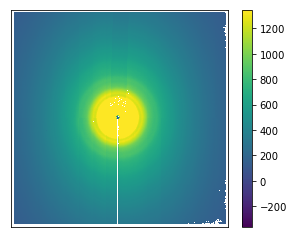

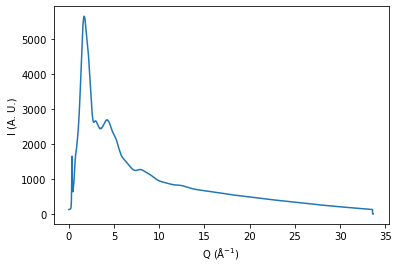

[PosixPath('data/chi/example_sample.chi')]

In [18]:
import pdfstream.cli as cli

cli.integrate(poni_file, averaged_tiff_file, output_dir="data/chi")

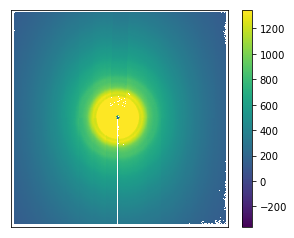

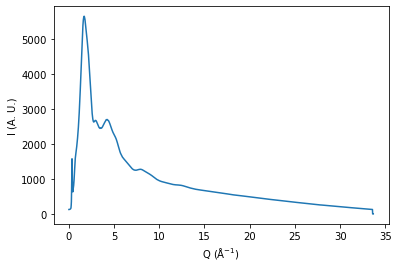

[PosixPath('data/chi/substrate.chi')]

In [19]:
cli.integrate(poni_file, averaged_substrate_tiff_file, output_dir="data/chi")